# Group 1 - Project 1
## Data Analysis

In [67]:
# Overview of data analysis

In [68]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as st
import requests
import json
import pprint
from FedConfig import api_key

## FRED

In [69]:
# Import Fed Funds data csv
fed_path = 'resources/FEDFUNDS.csv'
fed_df = pd.read_csv(fed_path, encoding = 'UTF-8')

# Change Data Type
fed_df['DATE'] = pd.to_datetime(fed_df['DATE'])
fed_df.rename(columns={'DATE':'Date','FEDFUNDS':'Fed Funds Rate'}, inplace=True)


In [70]:
# Preview Fed Funds data
fed_df


,Date,Fed Funds Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


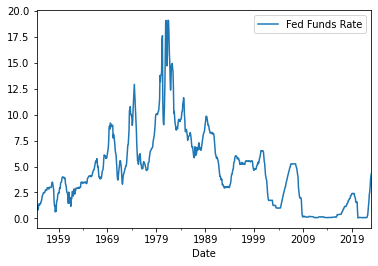

In [71]:
# Plot FedFunds dataframe
fed_df.plot(x='Date', y='Fed Funds Rate', kind='line')
plt.show()

In [72]:
# Summary of Fed Funds Rate data



In [73]:
# Import Fed Funds percent change data
ff_change_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=FEDFUNDS&frequency=m&api_key={api_key}&file_type=json&units=pch'
ff_change_r=requests.get(ff_change_url)
ff_change_data = ff_change_r.json()
pprint.pprint(ff_change_data)

{'count': 823,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1954-07-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '1954-08-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '52.50000'},
                  {'date': '1954-09-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '-12.29508'},
                  {'date': '1954-10-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '-20.56075'},
                  {'date': '1954-11-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
           

In [74]:
# Create Fed Funds Rate percent change dataframe
ff_change_df = pd.DataFrame(ff_change_data)

# Reformatting data
ff_change_df = ff_change_df['observations'].apply(pd.Series)
ff_change_df = ff_change_df[['date','value']]
ff_change_df = ff_change_df[ff_change_df['value'] != '.']
ff_change_df['value'] = ff_change_df['value'].astype(float)
ff_change_df['date'] = pd.to_datetime(ff_change_df['date'])
ff_change_df.rename(columns={'date':'Date','value':'Fed Funds Rate Percent Change'}, inplace=True)
ff_change_df

,Date,Fed Funds Rate Percent Change
1,1954-08-01,52.50000
2,1954-09-01,-12.29508
3,1954-10-01,-20.56075
4,1954-11-01,-2.35294
5,1954-12-01,54.21687
...,...,...
818,2022-09-01,9.87124
819,2022-10-01,20.31250
820,2022-11-01,22.72727
821,2022-12-01,8.46561


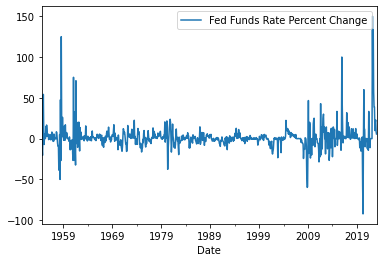

In [75]:
# Plot SP500 Percent Change DataFrame
ff_change_df.plot(x= 'Date', y='Fed Funds Rate Percent Change', kind='line')
plt.show()

In [76]:
# Import Fed Funds percent change data
ff_valuechange_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=FEDFUNDS&frequency=m&api_key={api_key}&file_type=json&units=chg'
ff_valuechange_r=requests.get(ff_valuechange_url)
ff_valuechange_data = ff_valuechange_r.json()
pprint.pprint(ff_valuechange_data)

{'count': 823,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1954-07-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '1954-08-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '0.42'},
                  {'date': '1954-09-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '-0.15'},
                  {'date': '1954-10-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '-0.22'},
                  {'date': '1954-11-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'val

In [77]:
# Create Fed Funds Rate percent change dataframe
ff_valuechange_df = pd.DataFrame(ff_valuechange_data)

# Reformatting data
ff_valuechange_df = ff_valuechange_df['observations'].apply(pd.Series)
ff_valuechange_df = ff_valuechange_df[['date','value']]
ff_valuechange_df = ff_valuechange_df[ff_valuechange_df['value'] != '.']
ff_valuechange_df['value'] = ff_valuechange_df['value'].astype(float)
ff_valuechange_df['date'] = pd.to_datetime(ff_valuechange_df['date'])
ff_valuechange_df.rename(columns={'date':'Date','value':'Fed Funds Rate Value Change'}, inplace=True)
ff_valuechange_df

,Date,Fed Funds Rate Value Change
1,1954-08-01,0.42
2,1954-09-01,-0.15
3,1954-10-01,-0.22
4,1954-11-01,-0.02
5,1954-12-01,0.45
...,...,...
818,2022-09-01,0.23
819,2022-10-01,0.52
820,2022-11-01,0.70
821,2022-12-01,0.32


## S&P 500

In [78]:
# Import S&P 500 value data & Preview
SP500_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=SP500&frequency=m&api_key={api_key}&file_type=json'
SP500r=requests.get(SP500_url)
SP500_data = SP500r.json()
pprint.pprint(SP500_data)

{'count': 121,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '2013-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '1550.83'},
                  {'date': '2013-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '1570.70'},
                  {'date': '2013-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '1639.84'},
                  {'date': '2013-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                

In [79]:
# Create S&P 500 DataFrame
SP500_df = pd.DataFrame(SP500_data)

# Reformatting Data
SP500_df = SP500_df['observations'].apply(pd.Series)
SP500_df = SP500_df[['date','value']]
SP500_df = SP500_df[SP500_df['value'] != '.']
SP500_df['value'] = SP500_df['value'].astype(float)
SP500_df['date'] = pd.to_datetime(SP500_df['date'])
SP500_df.rename(columns={'date':'Date','value':'S&P 500 Value'}, inplace=True)
SP500_df

,Date,S&P 500 Value
1,2013-03-01,1550.83
2,2013-04-01,1570.70
3,2013-05-01,1639.84
4,2013-06-01,1618.77
5,2013-07-01,1668.68
...,...,...
115,2022-09-01,3850.52
116,2022-10-01,3726.05
117,2022-11-01,3917.49
118,2022-12-01,3912.38


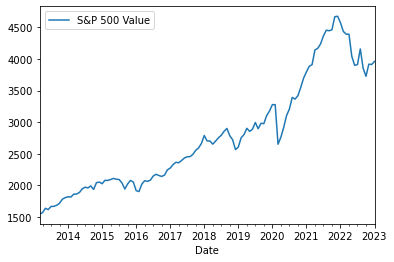

In [80]:
# Plot SP500 Valuation DataFrame
SP500_df.plot(x= 'Date', y='S&P 500 Value', kind='line')
plt.show()

In [81]:
# Summary of S&P 500 data


In [82]:
# Import S&P 500 percent change data
SP500_change_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=SP500&frequency=m&api_key={api_key}&file_type=json&units=pch'
SP500_change_r=requests.get(SP500_change_url)
SP500_change_data = SP500_change_r.json()
pprint.pprint(SP500_change_data)

{'count': 121,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '2013-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '1.28146'},
                  {'date': '2013-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '4.40188'},
                  {'date': '2013-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'va

In [83]:
# Create S&P 500 percent change DataFrame
SP500_change_df = pd.DataFrame(SP500_change_data)

# Reformatting data
SP500_change_df = SP500_change_df['observations'].apply(pd.Series)
SP500_change_df = SP500_change_df[['date','value']]
SP500_change_df = SP500_change_df[SP500_change_df['value'] != '.']
SP500_change_df['value'] = SP500_change_df['value'].astype(float)
SP500_change_df['date'] = pd.to_datetime(SP500_change_df['date'])
SP500_change_df.rename(columns={'date':'Date','value':'S&P 500 Percent Change'}, inplace=True)
SP500_change_df

,Date,S&P 500 Percent Change
2,2013-04-01,1.28146
3,2013-05-01,4.40188
4,2013-06-01,-1.28489
5,2013-07-01,3.08277
6,2013-08-01,0.08499
...,...,...
115,2022-09-01,-7.40743
116,2022-10-01,-3.23254
117,2022-11-01,5.13782
118,2022-12-01,-0.13038


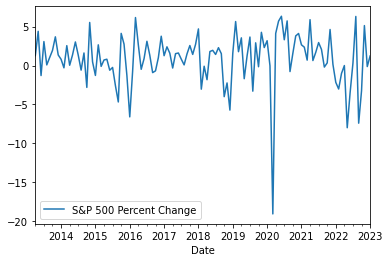

In [84]:
# Plot SP500 Percent Change DataFrame
SP500_change_df.plot(x= 'Date', y='S&P 500 Percent Change', kind='line')
plt.show()

In [85]:
# Summary of S&P 500 data

In [86]:
# Import S&P 500 value change data & preview
SP500_valuechange_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=SP500&frequency=m&api_key={api_key}&file_type=json&units=chg'
SP500r_valuechange=requests.get(SP500_valuechange_url)
SP500_valuechange_data = SP500r_valuechange.json()
pprint.pprint(SP500_valuechange_data)

{'count': 121,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '2013-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '19.8732727272727273'},
                  {'date': '2013-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '69.1404545454545454'},
                  {'date': '2013-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13'

In [87]:
# Create S&P 500 percent change DataFrame
SP500_valuechange_df = pd.DataFrame(SP500_valuechange_data)

# Reformatting data
SP500_valuechange_df = SP500_valuechange_df['observations'].apply(pd.Series)
SP500_valuechange_df = SP500_valuechange_df[['date','value']]
SP500_valuechange_df = SP500_valuechange_df[SP500_valuechange_df['value'] != '.']
SP500_valuechange_df['value'] = SP500_valuechange_df['value'].astype(float)
SP500_valuechange_df['date'] = pd.to_datetime(SP500_valuechange_df['date'])
SP500_valuechange_df.rename(columns={'date':'Date','value':'S&P 500 Value Change'}, inplace=True)
SP500_valuechange_df

,Date,S&P 500 Value Change
2,2013-04-01,19.873273
3,2013-05-01,69.140455
4,2013-06-01,-21.070227
5,2013-07-01,49.902955
6,2013-08-01,1.418182
...,...,...
115,2022-09-01,-308.042567
116,2022-10-01,-124.469524
117,2022-11-01,191.437619
118,2022-12-01,-5.107619


## NASDAQ

In [88]:
# Import Nasdaq data & preview
NASDAQ_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=NASDAQCOM&frequency=m&api_key={api_key}&file_type=json'
NASDAQr=requests.get(NASDAQ_url)
NASDAQ_data = NASDAQr.json()
pprint.pprint(NASDAQ_data)

{'count': 625,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1971-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '1971-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '104.470435'},
                  {'date': '1971-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '109.555238'},
                  {'date': '1971-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '109.570500'},
                  {'date': '1971-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
       

In [89]:
# Create NASDAQ DataFrame
NASDAQ_df = pd.DataFrame(NASDAQ_data)

# Reformatting Data
NASDAQ_df = NASDAQ_df['observations'].apply(pd.Series)
NASDAQ_df = NASDAQ_df[['date','value']]
NASDAQ_df = NASDAQ_df[NASDAQ_df['value'] != '.']
NASDAQ_df['value'] = NASDAQ_df['value'].astype(float)
NASDAQ_df['date'] = pd.to_datetime(NASDAQ_df['date'])
NASDAQ_df.rename(columns={'date':'Date','value':'NASDAQ Value'}, inplace=True)
NASDAQ_df

,Date,NASDAQ Value
1,1971-03-01,104.470435
2,1971-04-01,109.555238
3,1971-05-01,109.570500
4,1971-06-01,108.567727
5,1971-07-01,109.303333
...,...,...
619,2022-09-01,11402.850000
620,2022-10-01,10801.494286
621,2022-11-01,10973.638095
622,2022-12-01,10838.995714


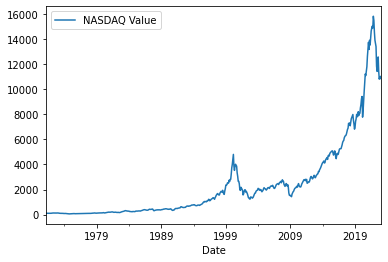

In [90]:
# Plot NASDAQ DataFrame
NASDAQ_df.plot(x= 'Date', y='NASDAQ Value', kind='line')
plt.show()

In [91]:
# Summary of Nasdaq data

In [92]:
# Import Nasdaq percent change data & preview
NASDAQ_change_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=NASDAQCOM&frequency=m&api_key={api_key}&file_type=json&units=pch'
NASDAQ_change_r=requests.get(NASDAQ_change_url)
NASDAQ_change_data = NASDAQ_change_r.json()
pprint.pprint(NASDAQ_change_data)

{'count': 625,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1971-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '1971-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '1971-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '4.86722'},
                  {'date': '1971-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '0.01393'},
                  {'date': '1971-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'va

In [93]:
# Create NASDAQ percent change DataFrame
NASDAQ_change_df = pd.DataFrame(NASDAQ_change_data)

# Reformatting data
NASDAQ_change_df = NASDAQ_change_df['observations'].apply(pd.Series)
NASDAQ_change_df = NASDAQ_change_df[['date','value']]
NASDAQ_change_df = NASDAQ_change_df[NASDAQ_change_df['value'] != '.']
NASDAQ_change_df['value'] = NASDAQ_change_df['value'].astype(float)
NASDAQ_change_df['date'] = pd.to_datetime(NASDAQ_change_df['date'])
NASDAQ_change_df.rename(columns={'date':'Date','value':'NASDAQ Percent Change'}, inplace=True)
NASDAQ_change_df

,Date,NASDAQ Percent Change
2,1971-04-01,4.86722
3,1971-05-01,0.01393
4,1971-06-01,-0.91518
5,1971-07-01,0.67755
6,1971-08-01,-2.55267
...,...,...
619,2022-09-01,-9.28708
620,2022-10-01,-5.27373
621,2022-11-01,1.59370
622,2022-12-01,-1.22696


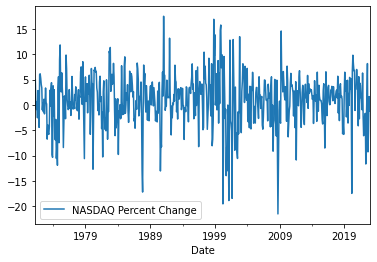

In [94]:
# Plot NASDAQ percent change DataFrame
NASDAQ_change_df.plot(x= 'Date', y='NASDAQ Percent Change', kind='line')
plt.show()

In [95]:
# Import S&P 500 value change data & preview
NASDAQ_valuechange_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=NASDAQCOM&frequency=m&api_key={api_key}&file_type=json&units=chg'
NASDAQr_valuechange=requests.get(NASDAQ_valuechange_url)
NASDAQ_valuechange_data = NASDAQr_valuechange.json()
pprint.pprint(NASDAQ_valuechange_data)

{'count': 625,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1971-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '1971-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '1971-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '5.0848033126293995'},
                  {'date': '1971-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '0.0152619047619048'},
                  {'date': '1971-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',


In [96]:
# Create S&P 500 percent change DataFrame
NASDAQ_valuechange_df = pd.DataFrame(NASDAQ_valuechange_data)

# Reformatting data
NASDAQ_valuechange_df = NASDAQ_valuechange_df['observations'].apply(pd.Series)
NASDAQ_valuechange_df = NASDAQ_valuechange_df[['date','value']]
NASDAQ_valuechange_df = NASDAQ_valuechange_df[NASDAQ_valuechange_df['value'] != '.']
NASDAQ_valuechange_df['value'] = NASDAQ_valuechange_df['value'].astype(float)
NASDAQ_valuechange_df['date'] = pd.to_datetime(NASDAQ_valuechange_df['date'])
NASDAQ_valuechange_df.rename(columns={'date':'Date','value':'NASDAQ Value Change'}, inplace=True)
NASDAQ_valuechange_df

,Date,NASDAQ Value Change
2,1971-04-01,5.084803
3,1971-05-01,0.015262
4,1971-06-01,-1.002773
5,1971-07-01,0.735606
6,1971-08-01,-2.790152
...,...,...
619,2022-09-01,-1167.410435
620,2022-10-01,-601.355714
621,2022-11-01,172.143810
622,2022-12-01,-134.642381


In [97]:
# Summary of Nasdaq data

## Dow-Jones

In [98]:
# Import Dow Jones data
DowJones_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=DJIA&frequency=m&api_key={api_key}&file_type=json'
DowJonesr=requests.get(DowJones_url)
DowJones_data = DowJonesr.json()
pprint.pprint(DowJones_data)

{'count': 121,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '2013-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '14418.26'},
                  {'date': '2013-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '14675.91'},
                  {'date': '2013-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '15172.18'},
                  {'date': '2013-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
             

In [99]:
# Create DOWJONES DataFrame
DowJones_df = pd.DataFrame(DowJones_data)

# Reformatting Data
DowJones_df = DowJones_df['observations'].apply(pd.Series)
DowJones_df = DowJones_df[['date','value']]
DowJones_df = DowJones_df[DowJones_df['value'] != '.']
DowJones_df['value'] = DowJones_df['value'].astype(float)
DowJones_df['date'] = pd.to_datetime(DowJones_df['date'])
DowJones_df.rename(columns={'date':'Date','value':'DowJones Value'}, inplace=True)
DowJones_df

,Date,DowJones Value
1,2013-03-01,14418.26
2,2013-04-01,14675.91
3,2013-05-01,15172.18
4,2013-06-01,15035.75
5,2013-07-01,15390.21
...,...,...
115,2022-09-01,30649.56
116,2022-10-01,30570.68
117,2022-11-01,33417.96
118,2022-12-01,33482.26


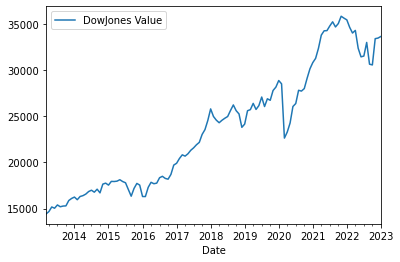

In [100]:
# Plot DowJones DataFrame
DowJones_df.plot(x= 'Date', y='DowJones Value', kind='line')
plt.show()

In [101]:
# Summary of Dow Jones data

In [102]:
# Import Dow Jones percent change data
DowJones_change_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=DJIA&frequency=m&api_key={api_key}&file_type=json&units=pch'
DowJones_change_r=requests.get(DowJones_change_url)
DowJones_change_data = DowJones_change_r.json()
pprint.pprint(DowJones_change_data)

{'count': 121,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '2013-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '1.78698'},
                  {'date': '2013-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '3.38154'},
                  {'date': '2013-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'va

In [103]:
# Create DOWJONES percent change DataFrame
DowJones_change_df = pd.DataFrame(DowJones_change_data)

# Reformatting ata
DowJones_change_df = DowJones_change_df['observations'].apply(pd.Series)
DowJones_change_df = DowJones_change_df[['date','value']]
DowJones_change_df = DowJones_change_df[DowJones_change_df['value'] != '.']
DowJones_change_df['value'] = DowJones_change_df['value'].astype(float)
DowJones_change_df['date'] = pd.to_datetime(DowJones_change_df['date'])
DowJones_change_df.rename(columns={'date':'Date','value':'DowJones Percent Change'}, inplace=True)
DowJones_change_df

,Date,DowJones Percent Change
2,2013-04-01,1.78698
3,2013-05-01,3.38154
4,2013-06-01,-0.89918
5,2013-07-01,2.35743
6,2013-08-01,-1.26615
...,...,...
115,2022-09-01,-7.14946
116,2022-10-01,-0.25735
117,2022-11-01,9.31374
118,2022-12-01,0.19241


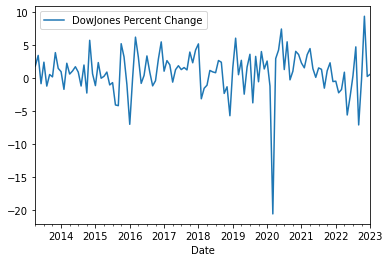

In [104]:
# Plot DowJones percent change DataFrame
DowJones_change_df.plot(x= 'Date', y='DowJones Percent Change', kind='line')
plt.show()

In [105]:
# Import Dow Jones value change data
DowJones_valuechange_url = f'https://api.stlouisfed.org/fred/series/observations?series_id=DJIA&frequency=m&api_key={api_key}&file_type=json&units=chg'
DowJones_valuechange_r=requests.get(DowJones_valuechange_url)
DowJones_valuechange_data = DowJones_valuechange_r.json()
pprint.pprint(DowJones_valuechange_data)

{'count': 121,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '2013-02-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-03-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '.'},
                  {'date': '2013-04-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '257.651090909091'},
                  {'date': '2013-05-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
                   'value': '496.271363636364'},
                  {'date': '2013-06-01',
                   'realtime_end': '2023-02-13',
                   'realtime_start': '2023-02-13',
    

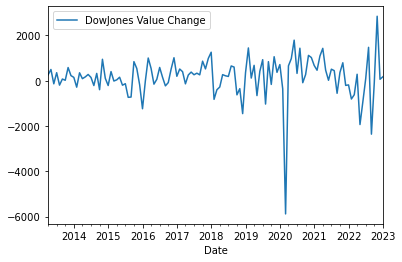

In [106]:
# Create DOWJONES value change DataFrame
DowJones_valuechange_df = pd.DataFrame(DowJones_valuechange_data)

# Reformatting data
DowJones_valuechange_df = DowJones_valuechange_df['observations'].apply(pd.Series)
DowJones_valuechange_df = DowJones_valuechange_df[['date','value']]
DowJones_valuechange_df = DowJones_valuechange_df[DowJones_valuechange_df['value'] != '.']
DowJones_valuechange_df['value'] = DowJones_valuechange_df['value'].astype(float)
DowJones_valuechange_df['date'] = pd.to_datetime(DowJones_valuechange_df['date'])
DowJones_valuechange_df.rename(columns={'date':'Date','value':'DowJones Value Change'}, inplace=True)
DowJones_valuechange_df

# Plot DowJones value change DataFrame
DowJones_valuechange_df.plot(x= 'Date', y='DowJones Value Change', kind='line')
plt.show()

## Data Cleanup & Wrangling

In [107]:
# Merge the DataFrames (All Data)
index_df = pd.merge(NASDAQ_df, SP500_df, on='Date', how='outer')
index_df = index_df.merge(DowJones_df, on='Date', how='outer')
index_df

,Date,NASDAQ Value,S&P 500 Value,DowJones Value
0,1971-03-01,104.470435,NaN,NaN
1,1971-04-01,109.555238,NaN,NaN
2,1971-05-01,109.570500,NaN,NaN
3,1971-06-01,108.567727,NaN,NaN
4,1971-07-01,109.303333,NaN,NaN
...,...,...,...,...
618,2022-09-01,11402.850000,3850.52,30649.56
619,2022-10-01,10801.494286,3726.05,30570.68
620,2022-11-01,10973.638095,3917.49,33417.96
621,2022-12-01,10838.995714,3912.38,33482.26


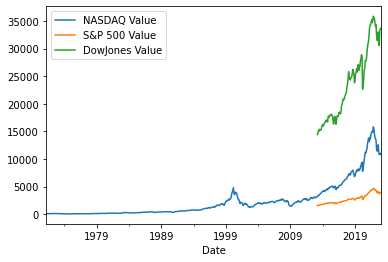

In [108]:
# Plot Indexs (All Data)
fig, ax = plt.subplots()
index_df.plot(x='Date', kind='line', ax=ax)

In [109]:
# Merge the DataFrames (2013-YTD)
ytd_df = pd.merge(NASDAQ_df, SP500_df, on='Date')
ytd_df = ytd_df.merge(DowJones_df, on='Date')
ytd_df

,Date,NASDAQ Value,S&P 500 Value,DowJones Value
0,2013-03-01,3236.167000,1550.83,14418.26
1,2013-04-01,3251.351818,1570.70,14675.91
2,2013-05-01,3440.375455,1639.84,15172.18
3,2013-06-01,3416.741500,1618.77,15035.75
4,2013-07-01,3559.710909,1668.68,15390.21
...,...,...,...,...
114,2022-09-01,11402.850000,3850.52,30649.56
115,2022-10-01,10801.494286,3726.05,30570.68
116,2022-11-01,10973.638095,3917.49,33417.96
117,2022-12-01,10838.995714,3912.38,33482.26


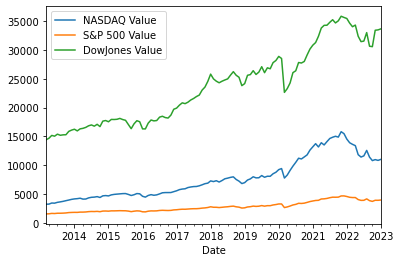

In [110]:
# Plot Indexs (2013-YTD)
fig, ax = plt.subplots()
ytd_df.plot(x='Date', kind='line', ax=ax)

In [111]:
# Merge the percent change DataFrames (All Data)
index_change_df = pd.merge(NASDAQ_change_df, SP500_change_df, on='Date', how='outer')
index_change_df = index_change_df.merge(DowJones_change_df, on='Date', how='outer')
index_change_df

,Date,NASDAQ Percent Change,S&P 500 Percent Change,DowJones Percent Change
0,1971-04-01,4.86722,NaN,NaN
1,1971-05-01,0.01393,NaN,NaN
2,1971-06-01,-0.91518,NaN,NaN
3,1971-07-01,0.67755,NaN,NaN
4,1971-08-01,-2.55267,NaN,NaN
...,...,...,...,...
617,2022-09-01,-9.28708,-7.40743,-7.14946
618,2022-10-01,-5.27373,-3.23254,-0.25735
619,2022-11-01,1.59370,5.13782,9.31374
620,2022-12-01,-1.22696,-0.13038,0.19241


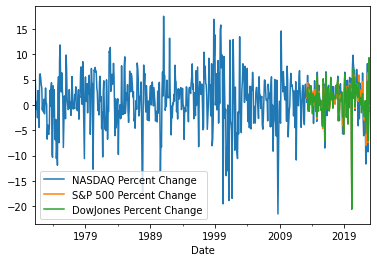

In [112]:
# Plot percent change indexes (all data)
fig, ax = plt.subplots()
index_change_df.plot(x='Date', kind='line', ax=ax)
plt.show()

In [113]:
# Merge the percent change DataFrames (2013-YTD)
ytd_change_df = pd.merge(NASDAQ_change_df, SP500_change_df, on='Date')
ytd_change_df = ytd_change_df.merge(DowJones_change_df, on='Date')
ytd_change_df

,Date,NASDAQ Percent Change,S&P 500 Percent Change,DowJones Percent Change
0,2013-04-01,0.46922,1.28146,1.78698
1,2013-05-01,5.81369,4.40188,3.38154
2,2013-06-01,-0.68696,-1.28489,-0.89918
3,2013-07-01,4.18438,3.08277,2.35743
4,2013-08-01,2.25349,0.08499,-1.26615
...,...,...,...,...
113,2022-09-01,-9.28708,-7.40743,-7.14946
114,2022-10-01,-5.27373,-3.23254,-0.25735
115,2022-11-01,1.59370,5.13782,9.31374
116,2022-12-01,-1.22696,-0.13038,0.19241


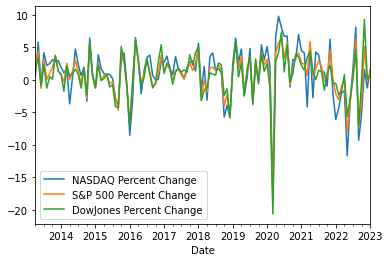

In [114]:
# Plot percent change indexes (2013-YTD)
fig, ax = plt.subplots()
ytd_change_df.plot(x='Date', kind='line', ax=ax)
plt.show()

In [115]:
# Merge the percent change DataFrames + Fed Funds data (All Data)
ffindex_change_df = pd.merge(index_change_df, ff_change_df, on='Date', how='outer')
ffindex_change_df.head(1000)

,Date,NASDAQ Percent Change,S&P 500 Percent Change,DowJones Percent Change,Fed Funds Rate Percent Change
0,1971-04-01,4.86722,NaN,NaN,12.12938
1,1971-05-01,0.01393,NaN,NaN,11.29808
2,1971-06-01,-0.91518,NaN,NaN,6.04752
3,1971-07-01,0.67755,NaN,NaN,8.14664
4,1971-08-01,-2.55267,NaN,NaN,4.89642
...,...,...,...,...,...
817,1970-11-01,NaN,NaN,NaN,-9.67742
818,1970-12-01,NaN,NaN,NaN,-12.50000
819,1971-01-01,NaN,NaN,NaN,-15.51020
820,1971-02-01,NaN,NaN,NaN,-10.14493


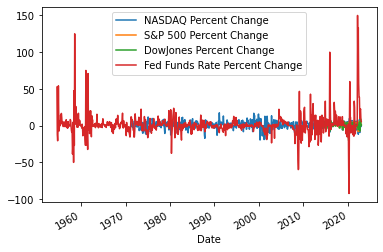

In [116]:
# Plot percent change indexes (all data)
fig, ax = plt.subplots()
ffindex_change_df.plot(x='Date', kind='line', ax=ax)
plt.show()

In [117]:
# Merge the percent change DataFrames (2013-YTD)
all_ytd_change_df = pd.merge(ytd_change_df, ff_change_df, on='Date')
all_ytd_change_df

,Date,NASDAQ Percent Change,S&P 500 Percent Change,DowJones Percent Change,Fed Funds Rate Percent Change
0,2013-04-01,0.46922,1.28146,1.78698,7.14286
1,2013-05-01,5.81369,4.40188,3.38154,-26.66667
2,2013-06-01,-0.68696,-1.28489,-0.89918,-18.18182
3,2013-07-01,4.18438,3.08277,2.35743,0.00000
4,2013-08-01,2.25349,0.08499,-1.26615,-11.11111
...,...,...,...,...,...
113,2022-09-01,-9.28708,-7.40743,-7.14946,9.87124
114,2022-10-01,-5.27373,-3.23254,-0.25735,20.31250
115,2022-11-01,1.59370,5.13782,9.31374,22.72727
116,2022-12-01,-1.22696,-0.13038,0.19241,8.46561


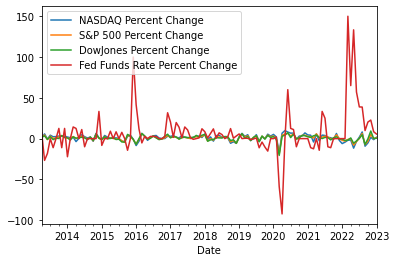

In [118]:
# Plot percent change indexes (2013-YTD)
fig, ax = plt.subplots()
all_ytd_change_df.plot(x='Date', kind='line', ax=ax)
plt.show()

In [119]:
valuechg_df = pd.merge(SP500_valuechange_df, NASDAQ_valuechange_df, on='Date', how='outer')
valuechg_df = valuechg_df.merge(DowJones_valuechange_df, on='Date', how='outer')
valuechg_df = valuechg_df.merge(ff_valuechange_df, on='Date', how='outer')
valuechg_df

,Date,S&P 500 Value Change,NASDAQ Value Change,DowJones Value Change,Fed Funds Rate Value Change
0,2013-04-01,19.873273,15.184818,257.651091,0.01
1,2013-05-01,69.140455,189.023636,496.271364,-0.04
2,2013-06-01,-21.070227,-23.633955,-136.425955,-0.02
3,2013-07-01,49.902955,142.969409,354.456864,0.00
4,2013-08-01,1.418182,80.217727,-194.863636,-0.01
...,...,...,...,...,...
817,1970-11-01,NaN,NaN,NaN,-0.60
818,1970-12-01,NaN,NaN,NaN,-0.70
819,1971-01-01,NaN,NaN,NaN,-0.76
820,1971-02-01,NaN,NaN,NaN,-0.42


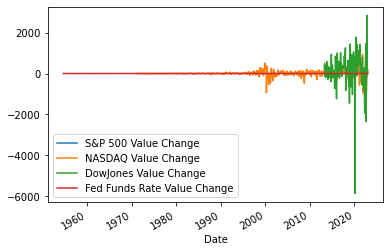

In [120]:
# Plot percent change indexes (all data)
fig, ax = plt.subplots()
valuechg_df.plot(x='Date', kind='line', ax=ax)
plt.show()

In [121]:
valuechg_inner_df = pd.merge(SP500_valuechange_df, NASDAQ_valuechange_df, on='Date', how='inner')
valuechg_inner_df = valuechg_inner_df.merge(DowJones_valuechange_df, on='Date', how='inner')
valuechg_inner_df = valuechg_inner_df.merge(ff_valuechange_df, on='Date', how='inner')
valuechg_inner_df

,Date,S&P 500 Value Change,NASDAQ Value Change,DowJones Value Change,Fed Funds Rate Value Change
0,2013-04-01,19.873273,15.184818,257.651091,0.01
1,2013-05-01,69.140455,189.023636,496.271364,-0.04
2,2013-06-01,-21.070227,-23.633955,-136.425955,-0.02
3,2013-07-01,49.902955,142.969409,354.456864,0.00
4,2013-08-01,1.418182,80.217727,-194.863636,-0.01
...,...,...,...,...,...
113,2022-09-01,-308.042567,-1167.410435,-2360.005259,0.23
114,2022-10-01,-124.469524,-601.355714,-78.875714,0.52
115,2022-11-01,191.437619,172.143810,2847.274286,0.70
116,2022-12-01,-5.107619,-134.642381,64.299048,0.32


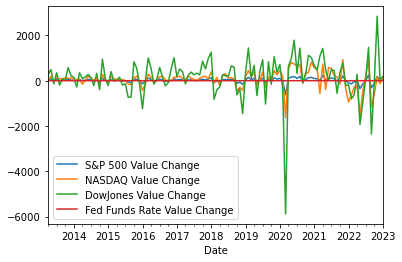

In [122]:
# Plot value change indexes (all data)
fig, ax = plt.subplots()
valuechg_inner_df.plot(x='Date', kind='line', ax=ax)
plt.show()

In [123]:
# Check data types

In [124]:
# Dataframes

In [125]:
# Tables

In [126]:
# Calculated Statistics
## Mean Median Mode: Fed Funds Rate, NASDAQ Value

## Write CSV 

In [127]:
# Combine all Dataframes into one
combined_df = pd.merge(fed_df, index_df, on='Date')
combined_df = combined_df.merge(all_ytd_change_df, on='Date')
combined_df = combined_df.merge(valuechg_df, on='Date')
combined_df

,Date,Fed Funds Rate,NASDAQ Value,S&P 500 Value,DowJones Value,NASDAQ Percent Change,S&P 500 Percent Change,DowJones Percent Change,Fed Funds Rate Percent Change,S&P 500 Value Change,NASDAQ Value Change,DowJones Value Change,Fed Funds Rate Value Change
0,2013-04-01,0.15,3251.351818,1570.70,14675.91,0.46922,1.28146,1.78698,7.14286,19.873273,15.184818,257.651091,0.01
1,2013-05-01,0.11,3440.375455,1639.84,15172.18,5.81369,4.40188,3.38154,-26.66667,69.140455,189.023636,496.271364,-0.04
2,2013-06-01,0.09,3416.741500,1618.77,15035.75,-0.68696,-1.28489,-0.89918,-18.18182,-21.070227,-23.633955,-136.425955,-0.02
3,2013-07-01,0.09,3559.710909,1668.68,15390.21,4.18438,3.08277,2.35743,0.00000,49.902955,142.969409,354.456864,0.00
4,2013-08-01,0.08,3639.928636,1670.09,15195.35,2.25349,0.08499,-1.26615,-11.11111,1.418182,80.217727,-194.863636,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2022-09-01,2.56,11402.850000,3850.52,30649.56,-9.28708,-7.40743,-7.14946,9.87124,-308.042567,-1167.410435,-2360.005259,0.23
114,2022-10-01,3.08,10801.494286,3726.05,30570.68,-5.27373,-3.23254,-0.25735,20.31250,-124.469524,-601.355714,-78.875714,0.52
115,2022-11-01,3.78,10973.638095,3917.49,33417.96,1.59370,5.13782,9.31374,22.72727,191.437619,172.143810,2847.274286,0.70
116,2022-12-01,4.10,10838.995714,3912.38,33482.26,-1.22696,-0.13038,0.19241,8.46561,-5.107619,-134.642381,64.299048,0.32


In [128]:
# Write combined DataFrame to CSV
path = os.path.join('resources/combined_index_df.csv')
combined_df.to_csv(path, index=False)

## Sources

In [129]:
# Sources
print("Sources")
print("https://fred.stlouisfed.org/docs/api/fred/")


Sources
https://fred.stlouisfed.org/docs/api/fred/
